
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>
## <font color=red> Please don't rename this .ipynb file.</font><br>
- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

##LOAD DATA

In [2]:
X = np.load('./data/train_X.npy')
Y = np.array([np.load('./data/train_y.npy')]).T

Normalization / Standardization

In [3]:
def normalize(X):
  """
  Implement Normalization for input image features

  Args:
  X : numpy array of shape (n_samples, 784)
   
  Returns:
  X_norm : numpy array of shape (n_samples, 784) after normalization
  """
  X_norm = None
  
  ## TODO
  
  std = np.std(X, axis=0)
  std[std == 0] = 1
  X_norm = (X - np.mean(X, axis=0))/(std)
  
  ## END TODO

  assert X_norm.shape == X.shape

  return X_norm

def scaling(X):
  """
  Implement MinMax Scaling on input image features

  Args:
  X : numpy array of shape (n_samples, 784)
   
  Returns:
  X_scaled : numpy array of shape (n_samples, 784)
  """
  X_scaled = None

  ##TODO
  diff = (np.max(X, axis=0) - np.min(X, axis=0))
  diff[diff == 0] = 1
  X_scaled = (X - np.min(X, axis=0)) / (diff)
  
  ##END TODO
  
  assert X_scaled.shape == X.shape

  return X_scaled

### Split data into train/val

In [4]:
def split_data(X, Y, train_ratio=0.8):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    # Try Normalization and scaling and store it in X_transformed
    X_transformed = X

    ## TODO
    
    X_transformed = scaling(normalize(X)) #normalize(scaling(X)) #
    
    ## END TODO

    assert X_transformed.shape == X.shape

    num_samples = len(X)
    indices = np.arange(num_samples)
    num_train_samples = math.floor(num_samples * train_ratio)
    train_indices = np.random.choice(indices, num_train_samples, replace=False)
    val_indices = list(set(indices) - set(train_indices))
    X_train, Y_train, X_val, Y_val = X_transformed[train_indices], Y[train_indices], X_transformed[val_indices], Y[val_indices]
  
    return X_train, Y_train, X_val, Y_val

**Plotting image**

In [5]:
def plot_image(x, y, idx):
  """
  Plot the given feature vector into image of size 28 X 28 
  note that originally the image was of size 28*28 which is flattened or unrolled
  to 784 X 1 feature vector

  Args:
  x : numpy array of images
  y : numpy array of ground truth labels for images
  idx : index of the image
  """

  image = np.reshape(x[idx], (28,28))
  plt.imshow(image, interpolation='nearest')
  plt.show()
  print (f'The ground truth label for this iamge is : {y[idx]}')

Encode 1 for any one of the class and 0 to all other remaining class for all labels

In [6]:
def get_data_for_class(X,Y,id):
  """
  Args:
  X : numpy array of input features, shape - (n_samples x 784)
  Y : numpy array of input targets, shape - (n_samples x 1)
  id : class id (one of 1,4,7,9)

  Returns:
  class_X : numpy array of input features, shape - (n_samples x 784)
  class_Y : numpy array of input targets, where class_Y[i]=1 if Y[i]=id else class_Y[i]=0, shape - (n_samples x 784)
  """
  class_X, class_Y = None, None

  ##TODO
  class_X = X
  class_Y = np.array(Y == id, dtype=float)
  
  ##END TODO

  assert class_X.shape == X.shape and class_Y.shape == Y.shape

  return class_X, class_Y

Random Sampling

In [7]:
def sample_training_points(X, y, sample_size):
  """
  Takes input features, targets and sample size, and returns random sample of size = sample_size

  Args: 
  X : numpy array of shape (n_samples , n_features)
  y : numpy array of shape (n_samples , 1)
  
  Returns: 
  sampled_X : numpy array of shape (sample_size , n_eatures)
  sampled_y : numpy array of shape (sample_size , 1)

  """
  sampled_X , sampled_y = None, None
  
  ##TODO
    
  num_samples = len(X)
  indices = np.arange(num_samples)
  select_indices = np.random.choice(indices, sample_size, replace=False)
  sampled_X, sampled_y = X[select_indices], y[select_indices]
#   print(select_indices)
  
  
  ##END TODO

  assert sampled_X.shape==(sample_size,X.shape[1]) and sampled_y.shape==(sample_size,1)
  
  return sampled_X, sampled_y

LOGISTIC REGRESSION CLASSIFIER

In [8]:
def sigmoid(weights, bias, X):
  """
  Implement logistic/ sigmoid function

  Args:
  weights : numpy array of shape (n_dimension , 1)
  bias : scaler
  X : numpy array of shape (n_samples , n_dimension)

  Returns: 
  Y_sigmoid : numpy array of shape (n_samples, 1)
  """
  Y_sigmoid = None

  ##TODO

  Y = np.dot(X, weights) + bias
#   print("debug y", Y)
    
  Y_sigmoid = 1.0/(1.0 + np.exp(-Y))
#   print("Debug sigmoid", Y_sigmoid)
  
  ##END TODO
  assert Y_sigmoid.shape == (X.shape[0],1)

  return Y_sigmoid


def cross_entropy_loss(weights, bias, X, y):
  """
  Takes input features, weights, bias and target 
  and calculates binary cross entropy loss between y and predicted values of y.

  Args:
  weights : numpy array of shape (n_features, 1)
  bias : scalar
  X : numpy array of shape (n_samples, 1)
  y : numpy array of shape (n_samples, 1)
  
  Returns :
  loss : single float value
  """
  loss = 0.0

  ##TODO

  y_pred = sigmoid (weights, bias, X)
  loss = - (np.dot(y.T, np.log(y_pred+0.00001)) + np.dot((1-y).T, np.log(1-y_pred+0.00001)))/len(y)
  loss = loss.squeeze()    
  
  ##END TODO
  
  return loss
  
def grad(X, y, weights, bias):

  """
  Return gradient for weights and biases

  Args:
  X : numpy array of shape (n_samples , n_dimension)
  y : numpy array of shape (n_samples , 1)
  weights : numpy array of shape (n_dimension , 1)
  bias : scalar

  Returns: 
  gradient : [dw , db]
              dw - numpy array of shape (n_dimension , 1)
              db - numpy array of shape (1)
  """

  dw , db = None , None

  ##TODO
   
  y_pred = sigmoid(weights, bias, X)
  dw = (np.dot(X.T, y_pred - y))/len(y)
  db = np.mean(y_pred - y).squeeze()
#   n_samples = X.shape[0]
#   n_dimension = X.shape[1]
#   X_e = np.c_[X,np.ones(n_samples)]
#   gradval = -1 * np.mean((y - sigmoid(weights, bias, X)) * X_e, axis=0)
#   dw = gradval[:n_dimension].reshape(n_dimension, 1)
#   db = gradval[n_dimension].reshape(1,)
#   dw_b = np.dot(X_train.T, (y_pred - y))/len(y)
    
#   dw = dw_b[:-1]
#   db = dw_b[-1]
#   print("Debug grads", dw, db)
  
  ##END TODO

  assert dw.shape == weights.shape 

  gradient = [dw , db]

  return gradient

def logistic_regression(X, y, epoch, lr, sample_size):
  """
  Args :

  X : numpy array of inpuy features of shape (n_samples, n_features)
  y : numpy array of targets of shape (n_samples, 1)
  epochs : number of iterations of training
  lr : learning_rate
  sample_size : batch_size for each iteration

  Returns : 
  loss : list containg loss for each epoch
  weights : numpy array of shape (n_features, 1)
  bias :  scaler
  """

  loss, weights, bias = [], None, 0
  #define weights and bias (w, b) initialize the weight

  ##TODO
    
  weights = np.zeros((X.shape[1], 1))
  bias = 0

  for ep in range(epoch):
    X_b, y_b = sample_training_points(X, y, sample_size)
    dw, db = grad(X_b, y_b, weights, bias)
    weights -= lr*dw
    bias -= lr*db
    loss += [cross_entropy_loss(weights, bias, X, y)]
    
  
  ##TODO
  assert len(loss) == epoch and weights.shape == (X.shape[1],1)

  return [loss, weights, bias]

def train_multi_class(X, Y):
  """
  make multi class classifier using binary classification (1 vs all)

  Args:
  X : numpy array of input features of shape (n_samples, n_features)
  Y : numpy array of input features of shape (n_samples, 1)

  Returns:

  param_list : list of param for all classifiers, where param = [weights, bias]
  loss_list : list of lists of losses of all classifiers for all epochs
  """

  digits = [1,4,7,9]
  param_list = []
  loss_list = []


  #train i vs all weights and bias, where i in {1,4,7,9}
  epochs , lr , sample_size = 500, 0.01, 120

  for i in digits:
    X_train, Y_train = get_data_for_class(X, Y, id=i)
    output = logistic_regression(X_train, Y_train, epochs, lr, sample_size)
    param_list.append(output[1:]) 
    loss_list.append(output[0])   

  return param_list, loss_list

In [9]:
def to_class(predicts):
  """
  Args: 
  predicts : numpy array of shape (n_samples, 4)
  
  Return:
  predicted classes : numpy array of shape(num_samples, class_id), where class_id in {1,4,7,9}
  
  """
  labels = {0:1, 1:4, 2:7, 3:9}
  predicted_class = []
  for i in range(predicts.shape[0]):
    label = np.argmax(predicts[i])
    predicted_class.append(labels[label])

  return np.array(predicted_class).reshape(len(predicted_class),1)

def prediction(param, X):
  """
  It return the array of predicted class for all samples in X                                    

  Args: 
  param[0] = [w,b] of class 1 vs all
  param[1] = [w,b] of class 4 vs all
  param[2] = [w,b] of class 7 vs all
  param[3] = [w,b] of class 9 vs all

  X = numpy array of input features, shape (n_samples , 784)

  Returns:
  predicts = numpy array for shape (n_samples , 4), 
             where predicts[i][j] is probablity that sample i belongs to class j when using classifer j vs all

  """

  predicts = None

  ##TODO

  predicts = np.zeros((X.shape[0], len(param)))
  for i in range(len(param)):
    print(param[i][0].shape, param[i][1])
    predicts[:, i] = sigmoid(param[i][0], param[i][1], X).squeeze()
  
  ##END TODO
  assert predicts.shape == (X.shape[0],4)

  return predicts


In [10]:
def accuracy(Y_pred, Y_true):

  '''
  This functions calculates accuracy for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

  Args:
  Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
  Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

  Returns:
  list of length 5, 1 st value is overall accuracy followed by accuracy of all 4 individual classifies
  '''
  
  total_accuracy = np.sum(Y_pred==Y_true)/Y_true.shape[0]
  accuracy_1 , accuracy_4 , accuracy_7 , accuracy_9 = 0, 0, 0, 0
  #TODO
#   print(type(Y_true[0,0]))
  Y_true_1 = np.array(Y_true==1, dtype=int)
  Y_true_4 = np.array(Y_true==4, dtype=int)
  Y_true_7 = np.array(Y_true==7, dtype=int)
  Y_true_9 = np.array(Y_true==9, dtype=int)

  Y_pred_1 = np.array(Y_pred==1, dtype=int)
  Y_pred_4 = np.array(Y_pred==4, dtype=int)
  Y_pred_7 = np.array(Y_pred==7, dtype=int)
  Y_pred_9 = np.array(Y_pred==9, dtype=int)

  accuracy_1 = np.sum(Y_pred_1==Y_true_1)/Y_true.shape[0]
  accuracy_4 = np.sum(Y_pred_4==Y_true_4)/Y_true.shape[0]
  accuracy_7 = np.sum(Y_pred_7==Y_true_7)/Y_true.shape[0]
  accuracy_9 = np.sum(Y_pred_9==Y_true_9)/Y_true.shape[0]
  
  ##END TO

  print("Total Accuray : ", total_accuracy) 
  print("Accuray class 1 : ", accuracy_1) 
  print("Accuray class 4 : ", accuracy_4) 
  print("Accuray class 7 : ", accuracy_7) 
  print("Accuray class 9 : ", accuracy_9) 

  return [total_accuracy, accuracy_1, accuracy_4, accuracy_7, accuracy_9]

In [11]:
def calculate_metrics(Y_pred, Y_true):

  '''
  This functions calculates precision, recall and f1-score for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

  Args:
  Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
  Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

  Returns:
  (precision , recall , f1_score) : a tuple of 3 lists i.e. precison, recall and f1_score where
          precision : list of length 5, 1 st value is overall precison followed by precision of all 4 individual classes
          recall : list of length 5, 1 st value is overall recall followed by recall of all 4 individual classes
          f1_score : list of length 5, 1 st value is overall f1-score followed by f1-score of all 4 individual classes
  '''

  precision , recall , f1_score = [], [] ,[]

  ## TODO
  N = Y_pred.shape[0]
  precision.append(0)
  recall.append(0)
  f1_score.append(0)
  digits = [1,4,7,9]

  n_samples = len(Y_true)
  classes = [1, 4, 7, 9]
  y_class = np.zeros((n_samples, 4))
  y_pc = np.zeros((n_samples, 4))
  for digit in classes:
    
    I = Y_true == digit
    positives = np.sum(Y_pred == digit)
    TP = np.sum(Y_pred[I] == digit)
    FP = positives - TP
    FN = np.sum(I) - TP
      
    precision_ = TP/(TP+FN)
    recall_    = TP/(TP+FP)
    f1_score_  = (2*precision_*recall_)/(precision_ + recall_)
      
    precision.append(precision_)
    recall.append(recall_)
    f1_score.append(f1_score_)
      
    precision[0] += precision_*np.sum(I)
    recall[0]    += recall_*np.sum(I)
    f1_score[0]  += f1_score_*np.sum(I)
  
  precision[0] /= N
  recall[0]    /= N
  f1_score[0]  /= N
    
    

  ## END TODO

  assert len(precision)==5 and len(recall)==5 and len(f1_score)==5

  return (precision, recall, f1_score)

In [12]:
def plot_training_loss(loss_list):
  labels = ["1", "4", "7", "9"]
  for ids, loss in enumerate(loss_list):
    plt.plot(loss, label = labels[ids])
  plt.legend(loc='best')
  plt.title('Training Loss of each class (1 vs all)')
  plt.show()

In [13]:
X_train, Y_train, X_val, Y_val = split_data(X,Y)
param_lists, loss_list = train_multi_class(X_train, Y_train)

## Plot curve for loss

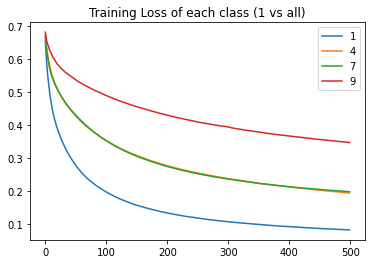

In [14]:
plot_training_loss(loss_list)

## Calculate accuracy, precision , recall and F1-score

In [15]:
Y_pred = to_class( prediction(param_lists, X_val) )

(784, 1) -0.014828130698383865
(784, 1) -0.0902643010909668
(784, 1) -0.10749926386665747
(784, 1) -0.20397416364735646


In [16]:
accuracy(Y_pred, Y_val)

Total Accuray :  0.93
Accuray class 1 :  0.975
Accuray class 4 :  0.9675
Accuray class 7 :  0.9625
Accuray class 9 :  0.955


[0.93, 0.975, 0.9675, 0.9625, 0.955]

In [17]:
precision, recall, f1_score = calculate_metrics(Y_pred, Y_val)

In [18]:
data = [precision, recall, f1_score]

In [19]:
import pandas as pd
df = pd.DataFrame(data, index = ['Precision', 'Recall', 'F1-score'], columns = ['Total', 'class 1', 'class 4', 'class 7', 'class 9'])

In [20]:
df

,Total,class 1,class 4,class 7,class 9
Precision,0.930000,1.00000,0.920000,0.924370,0.862500
Recall,0.930557,0.90991,0.948454,0.948276,0.907895
F1-score,0.929526,0.95283,0.934010,0.936170,0.884615


In [26]:
y_m = np.ones(Y_val.shape)
accuracy(y_m, Y_val)


Total Accuray :  0.2525
Accuray class 1 :  0.2525
Accuray class 4 :  0.75
Accuray class 7 :  0.7025
Accuray class 9 :  0.8


[0.2525, 0.2525, 0.75, 0.7025, 0.8]

In [27]:
def overall_metrics(Y_pred, Y_true):


  '''
  This functions calculates the overall precision, recall and f1-score

  Args:
  Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
  Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

  Returns:
  The overall precision, recall and f1-score
  '''

  precision , recall , f1_score = [], [] ,[]

  ## TODO

  N = Y_pred.shape[0]
  precision.append(0)
  recall.append(0)
  f1_score.append(0)
  digits = [1,4,7,9]
  
  for digit in digits:
      
      I = Y_true == digit
      positives = np.sum(Y_pred == digit)
      TP = np.sum(Y_pred[I] == digit)
      FP = positives - TP
      FN = np.sum(I) - TP
      
      if ((TP+FN) > 0): 
          precision_ = TP/(TP+FN)
      else:
          precision_ = 1
      if ((TP+FP) > 0):
          recall_    = TP/(TP+FP)
      else:
          recall_    = 1
      f1_score_  = (2*precision_*recall_)/(precision_ + recall_)
      
      precision.append(precision_)
      recall.append(recall_)
      f1_score.append(f1_score_)
      
      precision[0] += precision_*np.sum(I)
      recall[0]    += recall_*np.sum(I)
      f1_score[0]  += f1_score_*np.sum(I)
  
  precision[0] /= N
  recall[0]    /= N
  f1_score[0]  /= N
    
  return precision[0], recall[0], f1_score[0]

N = Y_val.shape[0]
Y_pred = np.ones((N,1))
p, r, f = overall_metrics(y_m, Y_val)
print("Precision for 1-digit model : \t", p)
print("Recall for 1-digit model : \t", r)
print("F1 Score for 1-digit model : \t", f)

Precision for 1-digit model : 	 0.2525
Recall for 1-digit model : 	 0.81125625
F1 Score for 1-digit model : 	 0.10180638722554891


In [28]:
precision, recall, f1_score = calculate_metrics(y_m, Y_val)
datam = [precision, recall, f1_score]
dfm = pd.DataFrame(datam, index = ['Precision', 'Recall', 'F1-score'], columns = ['Total', 'class 1', 'class 4', 'class 7', 'class 9'])

dfm

c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in long_scalars


,Total,class 1,class 4,class 7,class 9
Precision,0.2525,1.000000,0.0,0.0,0.0
Recall,NaN,0.252500,NaN,NaN,NaN
F1-score,NaN,0.403194,NaN,NaN,NaN


In [29]:
print(np.sum(Y_val == 1))
print(np.sum(Y_val == 4))
print(np.sum(Y_val == 7))
print(np.sum(Y_val == 9))

101
100
119
80
